In [9]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp
import mpmath 

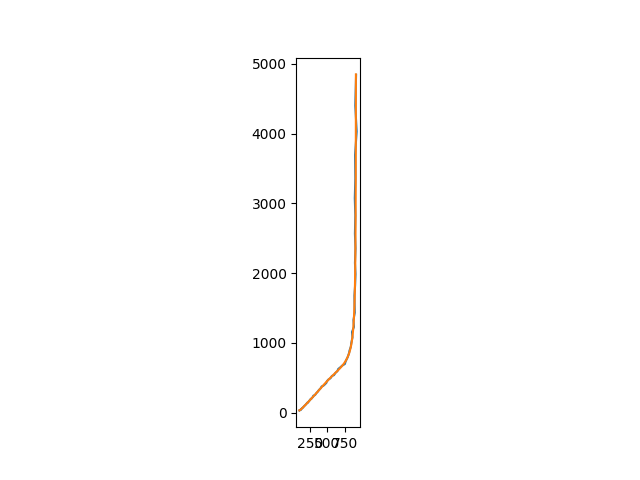

In [10]:
freq_list=np.logspace(-1,3,100)
#parameter for the TLM
Q_dt=6.61e-4
alpha_dt=1

R1_dt=1000
delta1_dt=0.12
R2_dt=2000
delta2_dt=0.17
R3_dt=2.15*194.5


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

cmodel=CustomCircuit(initial_guess=[R1_dt,R1_dt*Q_dt,R2_dt*Q_dt,alpha_dt,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMlinnew_1-R_1-p(R_2,CPE_1)")
mp.dps=300
zexp=cmodel.predict(frequencies=freq_list)
zexp_noise=np.real(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.real(zexp)+(np.imag(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.imag(zexp))*1j
fig, ax =plt.subplots()
# ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2])
ax.plot(np.real(zexp_noise),-np.imag(zexp_noise))
ax.plot(np.real(zexp),-np.imag(zexp))
ax.set_aspect("equal")

In [25]:
#initial guesses for the TLM
#Double layer Capacitance inside porous electrode
Q=6.61e-4
alpha=1

R1=400
delta1=0.3
R2=400

R3=400
delta2=0.3

#arbit
R4=500

#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=200
Rrxn=200
Qdl=6.61e-4
alpha2=1

#other (for arbitrary tortuosity profile)
Rref=200
a=4
b=5

# cmodel1=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

# cmodel2=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,R3*Q,delta1,delta2,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMthree_1-R_1-p(R_2,CPE_1)")

# cmodel3=CustomCircuit(initial_guess=[Q,alpha,R1,R2,R3,R4,Rhfr,Rrxn,Qdl,alpha2],circuit="arbitRCPE_1-R_1-p(R_2,CPE_1)")

cmodel4=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMilinnew_1-R_1-p(R_2,CPE_1)")

ValueError: TLMilinnew not in allowed elements (dict_keys(['s', 'p', 'R', 'C', 'L', 'W', 'Wo', 'Ws', 'CPE', 'La', 'G', 'Gs', 'K', 'Zarc', 'TLMQ', 'T', 'TLMuni', 'TLMtwo', 'TLMthree', 'TLMlin', 'TLMlinnew', 'TLMlinzert', 'TLMilin', 'TLMilinzert', '__builtins__']))

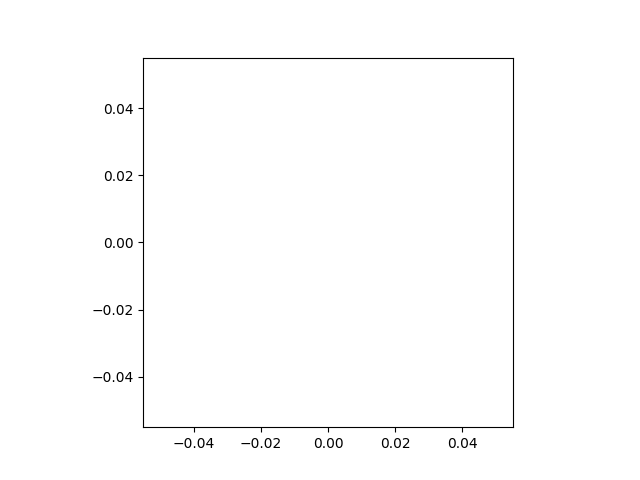

In [24]:
# zexp=cmodel.predict(frequencies=freq_list)
# zexp_noise=np.real(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.real(zexp)+(np.imag(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.imag(zexp))*1j
fig, ax =plt.subplots()
mp.dps=500
zilin=cmodel4.predict(frequencies=freq_list)
# ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2])
# ax.plot(np.real(zexp_noise),-np.imag(zexp_noise))
ax.plot(np.real(zilin),-np.imag(zilin))
# ax.plot(np.real(zexp),-np.imag(zexp))
ax.set_aspect("equal")